## Load and Extract

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import json, gzip

In [3]:
def load_data(path):
    
    data = []
    
    with gzip.open(path) as f:
        for ln in f:
            obj = json.loads(ln)
            data.append(obj)
    
    return data

In [4]:
data_train = load_data("data/train.jsonl.gz")

In [5]:
data_valid = load_data("data/dev.jsonl.gz")

In [34]:
def make_df(data, size):
    
    text = [data[i]['text'] for i in range(size)]
    
    summary = [data[i]['summary'] for i in range(size)]
    
    title = [data[i]['title'] for i in range(size)]
    
    df = pd.DataFrame({'text':text,'summary':summary, 'title':title})
    
    return df

In [35]:
df_train = make_df(data_train, 1000)

In [54]:
df_valid = make_df(data_valid, 300)

## Data Cleaning

In [9]:
df_train.shape

(1000, 2)

In [10]:
df_train.isna().sum()/df_train.shape[0]*100

text       0.0
summary    0.0
dtype: float64

In [11]:
df_train.duplicated().sum()

0

In [12]:
df_valid.shape

(300, 2)

In [13]:
df_valid.isna().sum()/df_valid.shape[0]

text       0.0
summary    0.0
dtype: float64

In [14]:
df_valid.duplicated().sum()

0

## Sentence Tokenization

In [19]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gilbertwong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
train_text = df_train['text'].apply(sent_tokenize)
train_summary = df_train['summary'].apply(sent_tokenize)
valid_text = df_valid['text'].apply(sent_tokenize)
valid_summary = df_valid['summary'].apply(sent_tokenize)

In [55]:
train_title = df_train['title']
valid_title = df_valid['title']

## Soft Clean

In [21]:
import re

In [22]:
def s_cleaner(text): 
    
    new_string = re.sub("\n", " ", text) 
    new_string = re.sub("Â\xad", "",new_string)
    new_string = re.sub(r'\([^)]*\)', '', new_string)
    
    return new_string

In [260]:
def ready(text):
    
    cleaned = []
    
    for x in text:
        cleaned.append(s_cleaner(x))
        
    return cleaned

In [261]:
train_text_ready = train_text.apply(ready)
valid_text_ready = valid_text.apply(ready)

In [706]:
train_text_ready[9]

["Wednesday, May 18th 2005, 9:59AM  Summer is shaping up as extra sweet at Cafe Centro, where the menu features treats like s'mores, chocolate fondue and a unique cocktail called the Cotton Candy Cosmo.",
 'The drink was created by mixologist Bill Rogers, whose inspiration was the fluffy confection that the restaurant  occasionally serves to customers.',
 'Priced at $9, the deeply colorful libation is topped with billows of bright pink cotton candy.',
 "It's light, summery and wonderful for sipping outside.",
 '2 ounces Absolut Citron Vodka  Pink cotton candy for the top  Shake vodka, Triple Sec, lime juice and cranberry juice vigorously in a shaker with ice.',
 'Strain into a martini glass.',
 'Garnish with pink cotton candy all around the rim and serve.']

## Hard Clean

In [40]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gilbertwong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
stop_words = stopwords.words('english')

In [42]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", 
                       "could've": "could have", "couldn't": "could not", "didn't": "did not", "doesn't": "does not", 
                       "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", 
                       "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", 
                       "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                       "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                       "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
                       "mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                       "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", 
                       "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                       "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
                       "she'll": "she will", "she'll've": "she will have", "she's": "she is", 
                       "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", 
                       "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", 
                       "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                       "there'd've": "there would have", "there's": "there is", "here's": "here is",
                       "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                       "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                       "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", 
                       "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
                       "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                       "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                       "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", 
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                       "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [43]:
def h_cleaner(text):
    
    new_string = text.lower()
    new_string = re.sub(r'\([^)]*\)', '', new_string)
    new_string = re.sub('"','', new_string)
    new_string = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in new_string.split(" ")])    
    new_string = re.sub(r"'s\b","",new_string)
    new_string = re.sub("[^a-zA-Z]", " ", new_string) 
    new_string = [w for w in new_string.split() if not w in stop_words]
    new_string = " ".join(new_string)
    
    return new_string

In [334]:
def clean(text):
    
    cleaned = []
    
    for y in text:
       
        cleaned.append(h_cleaner(y))
        
    return cleaned

In [335]:
train_text_cleaned = train_text.apply(clean)
valid_text_cleaned = valid_text.apply(clean)

In [336]:
train_title_cleaned = clean(train_title)
valid_title_cleaned = clean(valid_title)

In [62]:
train_title_cleaned[4]

'popeye worthy pie phyllo dough wraps spinach pure gold'

## EDA

#### Word count

In [32]:
text_word_count = pd.Series([i for y in train_text_cleaned for x in y for i in x.split()])

In [33]:
print("Text word count: ", len(text_word_count))

Text word count:  327937


In [34]:
summary_word_count = pd.Series([i for y in train_summary_cleaned for x in y for i in x.split()])

In [35]:
print("Summary word count: ", len(summary_word_count))

Summary word count:  21093


#### Vocab size

In [36]:
text_vocab_size = text_word_count.nunique()

In [37]:
print("Text vocab size: ", text_vocab_size)

Text vocab size:  33680


In [38]:
summary_vocab_size = summary_word_count.nunique()

In [39]:
print("Summary vocab size: ", summary_vocab_size)

Summary vocab size:  7998


#### Sentence and article lengths

In [49]:
text_sentence_lengths = [len(x.split()) for y in train_text_cleaned for x in y]
text_article_lengths = [len(y) for y in train_text_cleaned]
summary_sentence_lengths = [len(x.split()) for y in train_summary_cleaned for x in y]
summary_article_lengths = [len(y) for y in train_summary_cleaned]

Max text sentence length:  194


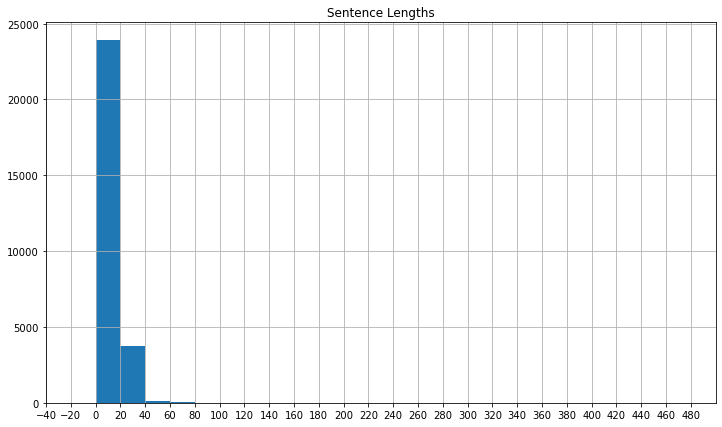

In [52]:
print("Max text sentence length: ", max(text_sentence_lengths))

plt.figure(figsize=(12,7))
plt.hist(text_sentence_lengths, bins=range(-40,500,20))
plt.grid()
plt.title('Sentence Lengths')
plt.xticks(range(-40,500,20))
plt.xlim(-40,500)
plt.show()

Max summary sentence lenth:  48


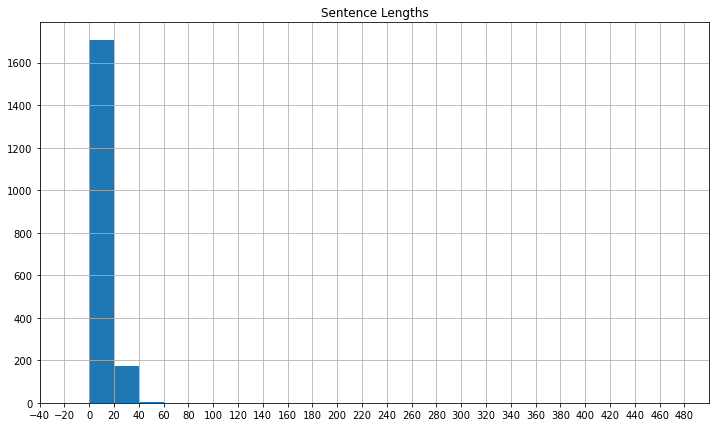

In [53]:
print("Max summary sentence lenth: ", max(summary_sentence_lengths))

plt.figure(figsize=(12,7))
plt.hist(summary_sentence_lengths, bins=range(-40,500,20))
plt.grid()
plt.title('Sentence Lengths')
plt.xticks(range(-40,500,20))
plt.xlim(-40,500)
plt.show()

Max text article lenth:  327


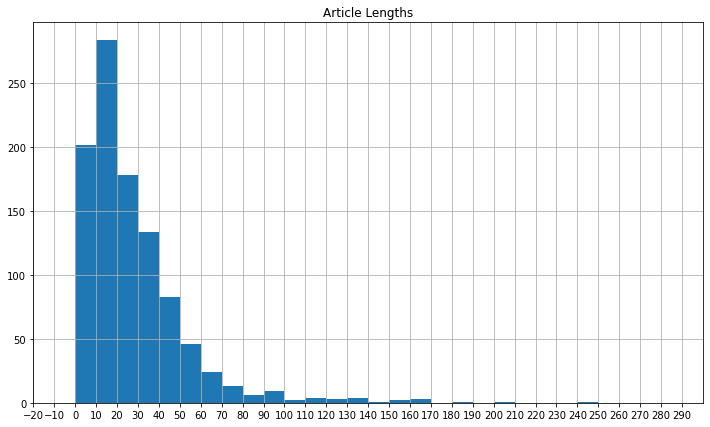

In [54]:
print("Max text article lenth: ", max(text_article_lengths))

plt.figure(figsize=(12,7))
plt.hist(text_article_lengths, bins=range(-30,300,10))
plt.grid()
plt.title('Article Lengths')
plt.xticks(range(-30,300,10))
plt.xlim(-20,300)
plt.show()

Max summary article lenth:  49


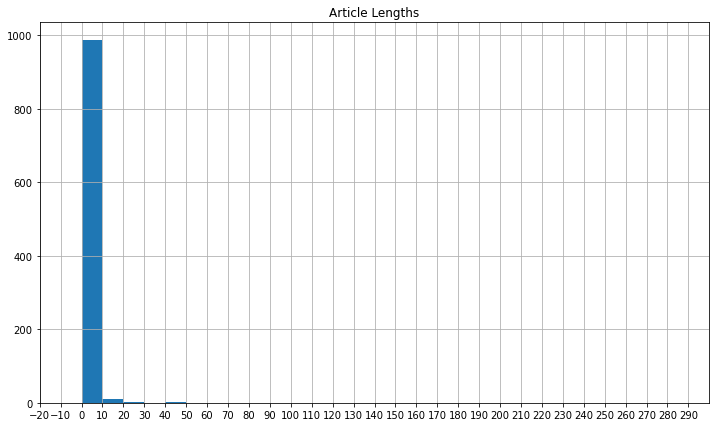

In [55]:
print("Max summary article lenth: ", max(summary_article_lengths))

plt.figure(figsize=(12,7))
plt.hist(summary_article_lengths, bins=range(-30,300,10))
plt.grid()
plt.title('Article Lengths')
plt.xticks(range(-30,300,10))
plt.xlim(-20,300)
plt.show()

## GloVe Vectors

In [49]:
word_embeddings = {}
with open('glove/glove.6B.100d.txt') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        word_embeddings[word] = coefs

print("Found %s word vectors." % len(word_embeddings))

Found 400000 word vectors.


In [50]:
def glove(cleaned_text):
    
    glove_vectors = []

    for i in cleaned_text:
        if len(i)!=0:
            v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
        else:
            v = np.zeros((100,))
         
        glove_vectors.append(v)
        
    return glove_vectors

In [337]:
train_text_vectors = train_text_cleaned.apply(glove)
valid_text_vectors = valid_text_cleaned.apply(glove)

In [338]:
train_title_vectors = glove(train_title_cleaned)
valid_title_vectors = glove(valid_title_cleaned)

In [333]:
pd.DataFrame(train_summary_vectors[3])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.006421,-0.009097,0.132893,-0.509808,0.088795,0.009663,0.082244,0.152632,-0.118104,-0.109640,...,0.206729,0.016490,0.257795,-0.085189,-0.115360,-0.084905,-0.317366,-0.033071,0.058453,0.321762
1,-0.082277,0.055387,0.167500,-0.213915,-0.138868,0.057554,-0.116489,0.155131,-0.165329,-0.102740,...,-0.037528,-0.128089,-0.065189,0.003792,-0.316062,-0.057625,-0.183228,-0.300233,0.268859,0.001943
2,-0.048630,0.216759,0.234176,-0.239641,0.235656,0.283271,0.067952,-0.109554,-0.181730,-0.118511,...,-0.109111,-0.051601,0.129526,0.171163,-0.189193,0.000964,-0.527312,-0.257123,0.252786,-0.006229


## Feature Engineering

#### Sentence Length

In [27]:
def length(text):
    sen_len = []
    for i in text:
        sen_len.append(len(i.split()))
    return sen_len
    

In [340]:
len_train_text = train_text.apply(length)
len_valid_text = valid_text.apply(length)

In [343]:
len_train_text

0      [42, 22, 20, 15, 30, 14, 26, 27, 14, 44, 34, 3...
1      [57, 26, 17, 16, 22, 24, 22, 31, 31, 31, 8, 8,...
2      [34, 29, 39, 21, 15, 19, 16, 25, 23, 12, 18, 2...
3      [2, 33, 20, 44, 6, 50, 20, 5, 18, 23, 12, 15, ...
4      [15, 28, 29, 16, 31, 24, 28, 11, 8, 7, 15, 19,...
                             ...                        
995    [19, 29, 24, 7, 10, 7, 31, 35, 22, 27, 19, 53,...
996                 [18, 27, 36, 33, 13, 20, 22, 29, 32]
997    [26, 22, 16, 25, 19, 18, 37, 21, 11, 9, 29, 13...
998                                         [20, 22, 11]
999           [15, 26, 27, 24, 4, 30, 12, 22, 21, 28, 6]
Name: text, Length: 1000, dtype: object

#### Sentence Position

In [29]:
def position(text):
    sen_pos = []
    for i in range(len(text)):
        sen_pos.append(i)
    return sen_pos

In [341]:
pos_train_text = train_text.apply(position)
pos_valid_text = valid_text.apply(position)

In [342]:
pos_train_text

0      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
2      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
3      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
4      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
                             ...                        
995    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
996                          [0, 1, 2, 3, 4, 5, 6, 7, 8]
997    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
998                                            [0, 1, 2]
999                   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Name: text, Length: 1000, dtype: object

#### Similarity to Title

In [68]:
from sklearn.metrics.pairwise import cosine_similarity

In [155]:
def similarity(vectors, titles):
    
    similarities = []

    for y in range(len(vectors)):
        sim=[]
        for i in vectors[y]:
            sim.append(cosine_similarity(i.reshape(1,100), titles[y].reshape(1,100))[0,0])

        similarities.append(sim)
        
    return similarities

In [181]:
sim_train_text = similarity(train_text_vectors,train_title_vectors)
sim_valid_text = similarity(valid_text_vectors,train_title_vectors)

#### Class Labels

In [184]:
from rouge import Rouge

In [350]:
def label(text,summary):
    rouge=Rouge()
    
    in_summary = []

    for y in range(len(text)):
        score=[]
        for i in text[y]:
            if len(i)<5:
                score.append(0)
            else:
                score.append(rouge.get_scores(i, summary[y])[0]['rouge-1']['p'])

        in_summary.append(score)
        
    return in_summary
        

In [355]:
in_summary_train_text = label(train_text,df_train['summary'])
in_summary_valid_text = label(valid_text,df_valid['summary'])

#### New Data

In [356]:
in_summary_train_text_col = [i for y in in_summary_train_text for i in y]
in_summary_valid_text_col = [i for y in in_summary_valid_text for i in y]

sim_train_text_col = [i for y in sim_train_text for i in y]
sim_valid_text_col = [i for y in sim_valid_text for i in y]

pos_train_text_col = [i for y in list(pos_train_text) for i in y]
pos_valid_text_col = [i for y in list(pos_valid_text) for i in y]

len_train_text_col = [i for y in list(len_train_text) for i in y]
len_valid_text_col = [i for y in list(len_valid_text) for i in y]

train_text_vectors_col = ([i for y in train_text_vectors for i in y])
valid_text_vectors_col = ([i for y in valid_text_vectors for i in y])

In [371]:
my_df = pd.concat([pd.DataFrame(train_text_vectors_col),
          pd.DataFrame({'Similarity to Title':sim_train_text_col, 
                        'Position':pos_train_text_col, 
                        'Length':len_train_text_col}),pd.DataFrame(in_summary_train_text_col,columns=['In Summary'])], axis=1)

In [403]:
my_df['In Summary'] = np.where(my_df['In Summary']>0.9,1,0)

In [413]:
my_df.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,Similarity to Title,Position,Length,In Summary
0,0.239452,0.102734,0.234894,-0.174725,-0.094059,0.274650,-0.023559,0.083373,-0.195346,0.040556,...,-0.096880,0.089614,-0.216621,0.240772,0.414017,0.003118,0.767189,0,42,0
1,0.022374,0.141280,-0.054070,-0.185928,-0.120961,0.297998,-0.024292,0.004567,-0.346148,0.221510,...,0.086314,-0.322175,-0.243045,-0.134423,0.120316,0.040390,0.544521,1,22,0
2,0.173180,0.120016,0.263398,-0.440565,0.002002,0.442076,0.005097,-0.016193,-0.109340,0.181097,...,-0.314783,-0.037334,-0.439217,0.185970,0.318253,-0.057048,0.675835,2,20,0
3,0.348962,-0.081873,0.063947,-0.059132,-0.094934,0.358266,0.165770,0.080942,-0.387012,0.184246,...,-0.307370,-0.056792,0.130049,0.167090,0.072156,-0.029804,0.599547,3,15,0
4,-0.058527,0.035508,0.106890,-0.275538,0.095127,-0.029855,0.117304,0.233706,-0.343617,-0.127908,...,-0.249230,0.183363,-0.306471,-0.098800,0.535119,0.209117,0.732753,4,30,0


#### Balance Classes

In [623]:
class0 = my_df[my_df['In Summary']==0]

In [626]:
class0.shape

(27054, 104)

In [624]:
class1 = my_df[my_df['In Summary']==1]

In [627]:
class1.shape

(775, 104)

In [593]:
n_class1 = len(np.where(my_df['In Summary']==1)[0])
n_class1

775

In [597]:
i_class0 = np.random.choice(class0.index,size=n_class1, replace=False)

In [618]:
class0_downsampled = class0[class0.index.isin(list(i_class0))]

In [658]:
class0_downsampled.shape

(775, 104)

In [628]:
new_df = pd.concat([class0_downsampled,class1],axis=0)

In [630]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,Similarity to Title,Position,Length,In Summary
10,0.074906,0.185542,0.311369,-0.034327,-0.051063,0.002670,-0.139215,0.376787,-0.150800,-0.027170,...,-0.053508,0.043440,-0.068108,0.087679,0.507870,0.227943,0.852771,10,34,0
18,-0.050202,0.488015,0.654801,-0.018602,-0.011405,-0.526450,-0.463120,-0.009224,0.295295,0.216747,...,-0.426254,0.211245,-0.035945,-0.079693,0.528161,0.050930,0.730846,18,10,0
48,-0.054492,0.206381,0.374167,-0.177233,-0.264491,0.169466,0.153305,0.312180,-0.329821,-0.171801,...,-0.212476,-0.094316,-0.222409,0.295452,0.245344,-0.050410,0.705852,48,34,0
76,0.180674,0.160564,0.461879,-0.505835,-0.568045,0.245144,0.175489,0.072469,-0.405293,-0.116369,...,-0.244398,-0.070404,-0.615180,0.190576,0.595807,0.187279,0.771176,76,22,0
80,0.112230,0.225882,0.267178,-0.297055,-0.233583,0.206699,-0.281025,-0.151438,0.192379,0.066182,...,-0.269609,-0.058405,-0.342235,-0.192893,0.349100,0.118655,0.726330,80,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26459,-0.163269,0.261137,0.187675,0.110712,0.840690,-0.166245,-0.189380,-0.195671,0.051417,-0.169552,...,-0.254609,0.010997,-0.528458,-0.317548,0.747351,0.555841,0.600734,7,9,1
26558,0.233518,0.289886,0.513732,0.020199,0.190478,-0.408414,-0.520298,-0.235144,0.167928,-0.336443,...,-0.416769,0.318817,0.074318,-0.276024,0.356413,0.225855,0.922571,0,28,1
27478,-0.064920,0.045588,0.539306,-0.311142,-0.026253,0.150301,-0.030516,0.417975,-0.401870,-0.219391,...,-0.487857,0.286313,-0.714556,0.132415,0.286938,-0.062167,0.914927,0,19,1
27622,-0.028879,0.035511,0.260401,-0.361276,-0.062420,0.178567,-0.404003,0.135973,0.064718,-0.090565,...,-0.201027,0.279950,-0.107136,0.016070,0.249026,0.044974,0.840404,1,32,1


#### Classification

In [631]:
X = new_df.drop('In Summary',axis=1)

In [632]:
y = new_df['In Summary']

In [525]:
from sklearn.linear_model import LogisticRegression

In [633]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X,y)

LogisticRegression(max_iter=1000)

In [634]:
lr_model.score(X,y)

0.7806451612903226

In [635]:
v_df = pd.concat([pd.DataFrame(valid_text_vectors_col),
          pd.DataFrame({'Similarity to Title':sim_valid_text_col, 
                        'Position':pos_valid_text_col, 
                        'Length':len_valid_text_col}),pd.DataFrame(in_summary_valid_text_col,columns=['In Summary'])], axis=1)

In [636]:
v_df['In Summary'] = np.where(v_df['In Summary']>0.9,1,0)

In [638]:
v_df

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,Similarity to Title,Position,Length,In Summary
0,-0.147195,0.058697,0.197094,-0.391006,-0.077530,-0.096007,-0.111803,0.057422,-0.152720,-0.342601,...,0.064607,0.075356,-0.138610,-0.155694,-0.130958,-0.171777,0.388653,0,7,0
1,-0.050732,0.140445,0.114130,0.039059,-0.041864,-0.000104,0.151305,0.287705,-0.352697,-0.174999,...,-0.457553,0.126135,-0.134282,0.124213,0.442941,0.063086,0.700639,1,14,0
2,0.104622,-0.068349,0.077994,-0.905276,0.071093,0.130177,0.158481,-0.005478,-0.501226,-0.305931,...,-0.411556,-0.043711,-0.304587,0.479707,-0.202459,-0.451889,0.470873,2,6,0
3,0.088158,0.187424,0.008872,-0.357629,0.011294,0.021502,0.192081,-0.179269,-0.345802,-0.115559,...,-0.326949,0.049975,-0.108660,0.157335,0.096037,-0.265299,0.627928,3,18,0
4,0.388557,-0.281953,0.284575,0.020760,-0.077275,0.102943,0.148672,0.079824,-0.265058,-0.100422,...,-0.043637,-0.018850,-0.240565,0.108263,0.378435,-0.182465,0.412759,4,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,-0.114656,0.163457,0.115069,-0.013123,0.013347,-0.217296,-0.358950,-0.064686,-0.000484,-0.013765,...,-0.254152,0.019300,0.211670,-0.181688,0.459916,0.276414,0.718127,2,30,0
7473,0.020281,-0.050478,-0.099727,-0.188224,0.156039,-0.374890,-0.056255,0.060511,-0.094146,-0.092483,...,-0.602794,-0.043543,0.241166,-0.118895,0.555094,-0.011134,0.665048,3,25,0
7474,-0.300429,0.363496,-0.029369,-0.133136,0.064978,-0.204011,-0.265335,-0.140547,-0.168170,-0.223460,...,-0.436378,-0.122374,-0.256793,-0.215954,0.397001,0.167654,0.568761,4,7,0
7475,0.032076,0.106110,0.110630,0.016042,0.085728,-0.215575,-0.145363,0.001741,-0.247022,0.117634,...,-0.456484,0.077239,0.052196,-0.135064,0.529994,0.047907,0.755397,5,38,0


In [639]:
X_valid = v_df.drop('In Summary',axis = 1)
y_valid = v_df['In Summary']

In [640]:
lr_model.score(X_valid,y_valid)

0.6851678480674067

In [642]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, lr_model.predict(X_valid))

array([[4953, 2298],
       [  56,  170]])

In [644]:
from sklearn.metrics import precision_score
precision_score(y_valid, lr_model.predict(X_valid))

0.06888168557536467

In [645]:
from sklearn.metrics import recall_score
recall_score(y_valid, lr_model.predict(X_valid))

0.7522123893805309

In [647]:
lr_model.predict_proba(X_valid)

array([[0.22498585, 0.77501415],
       [0.11555216, 0.88444784],
       [0.02777008, 0.97222992],
       ...,
       [0.80960557, 0.19039443],
       [0.36525558, 0.63474442],
       [0.59899603, 0.40100397]])

#### Generate Summaries

In [670]:
np.reshape(X_valid.iloc[0],(-1,2))

ValueError: cannot reshape array of size 103 into shape (2)

In [539]:
from sklearn.metrics import accuracy_score

In [682]:
def generate(text):
    in_summary=[]
    for i in range(len(text)):
        p = lr_model.predict_proba([X_valid.iloc[i]])[0][0]
        in_summary.append(p)
    return in_summary

In [691]:
X_valid.shape

(7477, 103)

In [693]:
len([i for y in valid_text for i in y])

7477

In [697]:
len(valid_text[1])

61

In [698]:
len(valid_text[0])

55

In [704]:
len(valid_text.apply(generate))

300

In [705]:
valid_text.apply(generate)[200]

[0.224985851203922,
 0.11555216371694921,
 0.027770084558416452,
 0.08497761172431384,
 0.49223282089343234,
 0.22373324099917313,
 0.5788243667340767,
 0.16000247317964533,
 0.23259549484019826,
 0.07653025897111854,
 0.02292534193314888,
 0.5028350416809767,
 0.6525524959090285]

In [552]:
X_valid.iloc[1,:]

0                      -0.050732
1                       0.140445
2                       0.114130
3                       0.039059
4                      -0.041864
                         ...    
98                      0.442941
99                      0.063086
Similarity to Title     0.700639
Position                1.000000
Length                 14.000000
Name: 1, Length: 103, dtype: float64

## TextRank

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from rouge import Rouge

In [150]:
!pip install rouge

#### Cosine Similarity

In [340]:
sim_mat=[]
for i in train_text_vectors:
    sim_mat.append(np.zeros([len(i), len(i)]))

In [341]:
i=-1
for z in train_text_vectors:
    i+=1
    for y in range(len(z)):
        for x in range(len(z)):
            if y!=x:
                sim_mat[i][y][x] = cosine_similarity(z[y].reshape(1,100), z[x].reshape(1,100))[0,0]

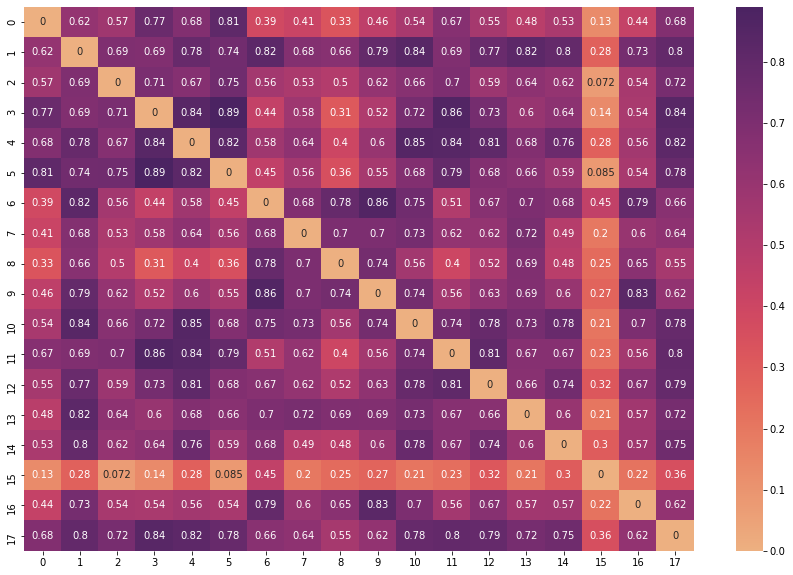

In [386]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame(sim_mat[4]),cmap='flare',annot=True);

#### PageRank Scores

In [83]:
!pip install networkx

In [387]:
pagerank_scores=[]
for i in sim_mat:
    nx_graph = nx.from_numpy_array(i)
    pagerank_scores.append(nx.pagerank_numpy(nx_graph))

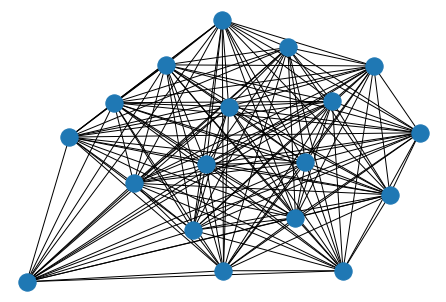

In [388]:
nx.draw(nx.from_numpy_array(sim_mat[4]))

#### Ranking

In [389]:
def rank(text, scores):

    ranked = []

    for x in range(len(text)):
        ranked_sentences = sorted(((scores[x][i],s) for i,s in enumerate(text[x])), reverse=True)
        ranked.append(ranked_sentences)
        
    return ranked

In [390]:
textranked = rank(ready_text, pagerank_scores)

In [391]:
textranked[3][:3]

[(0.02850842372169901,
  'Behind George Hamilton\'s legendary tan, there\'s really a soft, sensitive guy who just wants to talk about things like "School-To-Work: Reinventing America\'s Workforce."'),
 (0.028458044791680993,
  'Hey, better to date a guest like Shawntel Smith than, say, Ed Begley Jr.  Sources say Smith did her guest spot and they just really hit it off.'),
 (0.028419183288746125,
  'Now that "Saturday Night Live" is making great strides at standing on the edge of comedy once again, it makes sense that their musical guests might represent that same sort of edge.')]

In [392]:
textranked[3][-3:]

[(0.011548026204365682, 'BY A.J.'),
 (0.008663609361224803, 'Spooky.'),
 (0.003735990037359904, '')]

#### Summary

In [393]:
def summarize(ranked_sentences, length):
    
    summaries = []

    for sentences in ranked_sentences:

        summary = ""
        if len(sentences)>length:
            for i in range(length):
                summary += sentences[i][1] + " "
        else:
            for i in range(len(sentences)):
                summary += sentences[i][1] + " "

        summaries.append(summary)
    
    return summaries

In [394]:
textrank_summaries = summarize(textranked, 5)

In [404]:
textrank_summaries[9]

"Wednesday, May 18th 2005, 9:59AM  Summer is shaping up as extra sweet at Cafe Centro, where the menu features treats like s'mores, chocolate fondue and a unique cocktail called the Cotton Candy Cosmo. Garnish with pink cotton candy all around the rim and serve. Priced at $9, the deeply colorful libation is topped with billows of bright pink cotton candy. The drink was created by mixologist Bill Rogers, whose inspiration was the fluffy confection that the restaurant  occasionally serves to customers. 2 ounces Absolut Citron Vodka  Pink cotton candy for the top  Shake vodka, Triple Sec, lime juice and cranberry juice vigorously in a shaker with ice. "

#### Evaluation

In [399]:
def rouge2f(hypothesis,reference):
    
    rouge = Rouge()

    scores = []

    for i in range(len(hypothesis)): 
        score = rouge.get_scores(hypothesis[i], reference[i])[0]['rouge-2']['f']
        scores.append(score)
    
    return score

In [400]:
rouge2f(textrank_summaries,df_train['summary'])

0.2913907258032543

## Latent Semantic Indexing

In [283]:
from sklearn.decomposition import TruncatedSVD
import warnings
warnings.filterwarnings("ignore")

#### Topic Signatures

In [284]:
topic_sigs=[]

for i in train_sentence_vectors:
    svd = TruncatedSVD(n_components = 2)
    lsa = svd.fit_transform(i)
    topic_sig = [x[0] for x in lsa]
    topic_sigs.append(topic_sig)

#### Ranking

In [285]:
lsi_ranked = rank(ready_text, topic_sigs)

In [286]:
lsi_ranked[3][:3]

[(3.89871449000791, 'I like quiet."'),
 (3.862906295712312, 'I didn\'t care."'),
 (3.5701656570997, "Either way, it hasn't stopped Hollywood from calling.")]

In [287]:
lsi_ranked[3][-3:]

[(1.5319987125882426, 'BY A.J.'), (0.8478305323664805, 'Spooky.'), (-0.0, '')]

#### Summary

In [397]:
lsi_summaries = summarize(lsi_ranked, 5)

In [405]:
lsi_summaries[9]

"Strain into a martini glass. Garnish with pink cotton candy all around the rim and serve. 2 ounces Absolut Citron Vodka  Pink cotton candy for the top  Shake vodka, Triple Sec, lime juice and cranberry juice vigorously in a shaker with ice. It's light, summery and wonderful for sipping outside. Priced at $9, the deeply colorful libation is topped with billows of bright pink cotton candy. "

#### Evaluation

In [401]:
rouge2f(lsi_summaries,df_train['summary'])

0.05309734178714094

## TF-IDF

In [290]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### Term Frequency Weights

In [291]:
tf_weights = []

for y in train_sentences_cleaned:
    
    bagofwords = TfidfVectorizer()
    transformed = bagofwords.fit_transform(y)
    sentence_scores = [sum(i) for i in transformed.toarray()]
    tf_weights.append(sentence_scores)
    

#### Ranking

In [292]:
tfidf_ranked = rank(ready_text, tf_weights)

In [293]:
tfidf_ranked[3][:3]

[(5.2837713777144435,
  "In addition, some say they're even expecting Snoop Doggy Dogg and Death Row Records' CEO Suge Knight to be part of his entourage, since this will be Tupac's first live TV performance since his incarceration and some expect his record label to make a major show of respect."),
 (4.880817059187219,
  'Brad Posey, who owns the all-male photo and video studio Club 1821 as in men 18 to 21 which produced the videos, told us that Rex or Sebastian as he was known then "was very sweet and he performed very well, as any 19-year-old would who\'s at his sexual peak."'),
 (4.820737042167301,
  "Sources tell us the GOP front-runner was so angry about the entire situation involving Maseng and his widely panned response that he chose not to use a speech that Maseng wrote for this week's annual meeting of the National Governors' Association.")]

In [294]:
tfidf_ranked[3][-3:]

[(1.0, 'I didn\'t care."'), (0.0, 'BY A.J.'), (0.0, '')]

#### Summary

In [295]:
tfidf_summaries = summarize(tfidf_ranked, 5)

In [406]:
tfidf_summaries[9]

"Wednesday, May 18th 2005, 9:59AM  Summer is shaping up as extra sweet at Cafe Centro, where the menu features treats like s'mores, chocolate fondue and a unique cocktail called the Cotton Candy Cosmo. 2 ounces Absolut Citron Vodka  Pink cotton candy for the top  Shake vodka, Triple Sec, lime juice and cranberry juice vigorously in a shaker with ice. The drink was created by mixologist Bill Rogers, whose inspiration was the fluffy confection that the restaurant  occasionally serves to customers. Priced at $9, the deeply colorful libation is topped with billows of bright pink cotton candy. Garnish with pink cotton candy all around the rim and serve. "

#### Evaluation

In [402]:
rouge2f(tfidf_summaries,df_train['summary'])

0.28025477448010067